# Phase 3 Machine Learning Project- SYRIATEL CUSTOMER CHURN


## 1. Business understanding

In [61]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


##### Load dataset

In [6]:
data = pd.read_csv('./Data/bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- The data has 0 null values
- The data has various data types ranging from Object,integers, Floats and Booleans
- The structure of the data is 21 columns and 3333 entries

In [ ]:
# checking on all the column names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#checking the shape of the data
data.shape

(3333, 21)

The data has 3333 rows and 21 columns


In [31]:
data.duplicated().sum()

0

The data has 0 duplicated rows

### Visualization


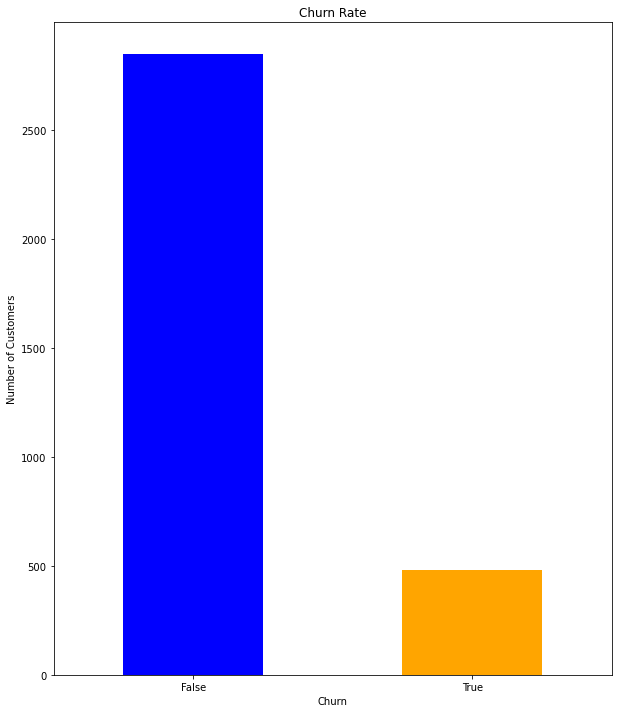

In [23]:
# count the values of the churn column
churn_count = data['churn']. value_counts()


# plot the bar chart
plt.figure(figsize=(10,12))
churn_count.plot(kind="bar",color=["blue", "orange"])
plt.title ('Churn Rate')
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1], labels=['False', "True"], rotation=0)
plt.show()


<AxesSubplot:xlabel='churn', ylabel='Density'>

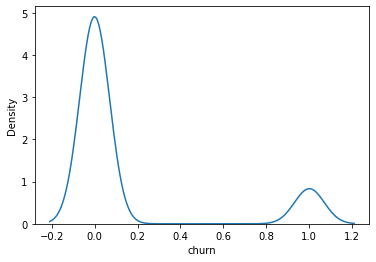

In [ ]:
#sns.kdeplot(x=data["churn"])

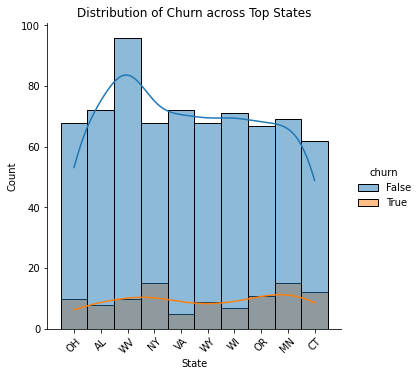

In [67]:


# Step 1: Identify the top states based on their frequency
top_states = data['state'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to include only the top states
filtered_df = data[data['state'].isin(top_states)]

# Step 3: Plot using Seaborn
sns.displot(data=filtered_df, x='state', hue='churn', kde=True)
plt.title('Distribution of Churn across Top States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#### correlation


one hot code - number of vmail messages, international calls

minutes and charges are corelated, remove these ie charges columns

multi -  remove one of the two

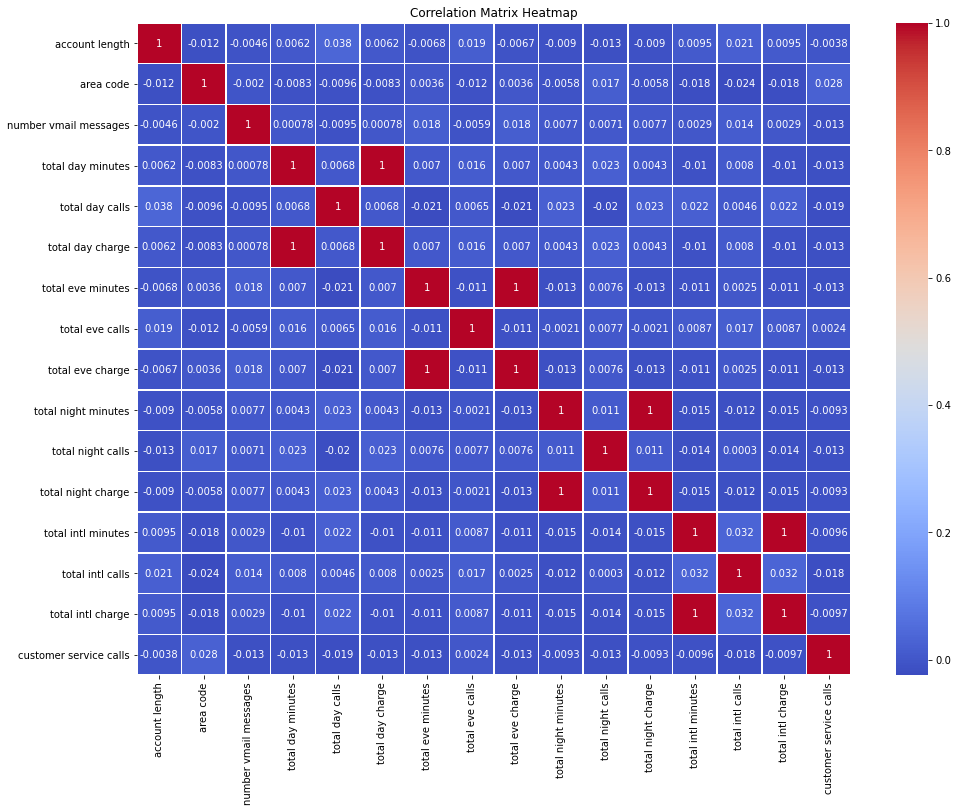

In [29]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# correlation computation for the numerical data
correlation = numerical_data.corr()
# Plot a heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Identify Predictors and Target

In [ ]:

#drop the phone number columns
data = data.drop(columns='phone number', 'area code' remove more)

#create a copy of the dataframe

df = data.copy()

# predictors and Target represented by X and y

X = df.drop(columns='churn')
y = df['churn']

In [40]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define a column transformer that applies OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Leave the other columns untouched
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = pipeline.predict(X_test)


c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# Initialize OneHotEncoder  


ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Fit the encoder to the categorical columns in X_train
ohe.fit(X_train_categorical_cols)

# Transform the data and create a DataFrame
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical_cols),
    index=X_train_categorical_cols.index,
    columns=np.hstack(ohe.categories_)
)

# Output
print(X_train_ohe.head())


       AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL  ...   VA   VT   WA  \
817   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1373  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
679   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
56    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1993  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       WI   WV   WY   no  yes   no  yes  
817   0.0  0.0  0.0  1.0  0.0  1.0  0.0  
1373  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
679   0.0  0.0  0.0  0.0  1.0  1.0  0.0  
56    0.0  0.0  0.0  1.0  0.0  1.0  0.0  
1993  0.0  0.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 55 columns]


In [34]:
# Create train and test data using random_state=42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# output
print(f"The shape for the X_train dataset is: {', '.join(map(str, X_train.shape))}.")
print(f"The shape for the y_train dataset is: {', '.join(map(str, y_train.shape))}.")
print(f"The shape for the X_test dataset is: {', '.join(map(str, X_test.shape))}.")
print(f"The shape for the y_test dataset is: {', '.join(map(str, y_test.shape))}.")

The shape for the X_train dataset is: 2666, 19.
The shape for the y_train dataset is: 2666.
The shape for the X_test dataset is: 667, 19.
The shape for the y_test dataset is: 667.


In [ ]:
# Establish the numerical columns in X_train and X_test datasets
X_train_num_cols = X_train.select_dtypes(include=["int64", "float64"]).copy()rename the variable
X_test_num_cols = X_test.select_dtypes(include=["int64", "float64"]).copy()rename the variable

# Establish the categorical columns in X_train and X_test datasets
X_train_categorical_cols = X_train.select_dtypes(include=["object"]).copy()
X_test_categorical_cols = X_test.select_dtypes(include=["object"]).copy()

# Display the first few rows of each for verification
print("Numerical columns in X_train:")
print(X_train_num_cols.head())
print("\nNumerical columns in X_test:")
print(X_test_num_cols.head())
print("\nCategorical columns in X_train:")
print(X_train_categorical_cols.head())
print("\nCategorical columns in X_test:")
print(X_test_categorical_cols.head())



Numerical columns in X_train:
      account length  area code  number vmail messages  total day minutes  \
817              243        510                      0               95.5   
1373             108        415                      0              112.0   
679               75        415                      0              222.4   
56               141        415                      0              126.9   
1993              86        510                      0              216.3   

      total day calls  total day charge  total eve minutes  total eve calls  \
817                92             16.24              163.7               63   
1373              105             19.04              193.7              110   
679                78             37.81              327.0              111   
56                 98             21.57              180.0               62   
1993               96             36.77              266.3               77   

      total eve charge  total ni

In [46]:
# Initialize the Scaler
scaler = MinMaxScaler()

# Fit the scaler to the training numerical columns
scaler.fit(X_train_num_cols)

# Transform the numerical columns in the training dataset
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num_cols),
    index=X_train_num_cols.index,
    columns=X_train_num_cols.columns
)

# Transform the numerical columns in the test dataset (if needed)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num_cols),
    index=X_test_num_cols.index,
    columns=X_test_num_cols.columns
)

# Display the first few rows of the scaled training data for verification
print(X_train_scaled.head())


      account length  area code  number vmail messages  total day minutes  \
817         1.000000   1.000000                    0.0           0.266801   
1373        0.442149   0.068627                    0.0           0.314187   
679         0.305785   0.068627                    0.0           0.631246   
56          0.578512   0.068627                    0.0           0.356979   
1993        0.351240   1.000000                    0.0           0.613728   

      total day calls  total day charge  total eve minutes  total eve calls  \
817          0.459259          0.266892           0.450096         0.370588   
1373         0.555556          0.314189           0.532582         0.647059   
679          0.355556          0.631250           0.899093         0.652941   
56           0.503704          0.356926           0.494913         0.364706   
1993         0.488889          0.613682           0.732197         0.452941   

      total eve charge  total night minutes  total night calls

In [47]:
# Establish the categorical columns in the X_train dataset
X_train_categorical_cols = X_train.select_dtypes(include=["object"]).copy()

# Display the first few rows of the categorical columns for verification
print(X_train_categorical_cols.head())


     state international plan voice mail plan
817     UT                 no              no
1373    SC                 no              no
679     TX                yes              no
56      CO                 no              no
1993    IN                 no              no


Modelling

Decision tree, Logistic regression
